In [1]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python -V || python3 -V

Python 3.11.2


# Libraries and functions

In [1]:
# ----------------------------------------------------------------------
# Import main libraries
# ----------------------------------------------------------------------

import numpy as np
import sys
import os

# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.path import Path
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from matplotlib import ticker

# ----------------------------------------------------------------------
# Source Seeking Tools

module_path = os.path.abspath("..")
if module_path not in sys.path:
    sys.path.append(module_path)

from sourceseeking_2d.toolbox import *
from sourceseeking_2d.scalar_field import *

from sourceseeking_2d.simulations import *

from sourceseeking_2d.plot_article import *
from sourceseeking_2d.plot_simulations import *

# ----------------------------------------------------------------------
# General configuration
# ----------------------------------------------------------------------

# Fix the random seed
np.random.seed(2023)

# Tell matplotlib to use latex
fontsize = 14
matplotlib.rc("font", **{"size": fontsize, "family": "serif"})
matplotlib.rc("text", **{"usetex": True, "latex.preamble": r"\usepackage{amsmath}"})
matplotlib.rc("mathtext", **{"fontset": "cm"})

# Fix font size
font_params = {'size' : 25}
matplotlib.rc('font', **font_params)

## Utils

In [8]:
"""
  Unicycle patch (Héctor García de Marina)
    * XY: position [X, Y] of the patch 
    * yaw: heading of the unicycle
"""
def unicycle_patch(XY, yaw, color, size=1, lw=0.5):
    Rot = np.array([[np.cos(yaw), np.sin(yaw)],[-np.sin(yaw), np.cos(yaw)]])

    apex = 45*np.pi/180 # 30 degrees apex angle
    b = np.sqrt(1) / np.sin(apex)
    a = b*np.sin(apex/2)
    h = b*np.cos(apex/2)

    z1 = size*np.array([a/2, -h*0.3])
    z2 = size*np.array([-a/2, -h*0.3])
    z3 = size*np.array([0, h*0.6])

    z1 = Rot.dot(z1)
    z2 = Rot.dot(z2)
    z3 = Rot.dot(z3)

    verts = [(XY[0]+z1[1], XY[1]+z1[0]), \
             (XY[0]+z2[1], XY[1]+z2[0]), \
             (XY[0]+z3[1], XY[1]+z3[0]), \
             (0, 0)]

    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(verts, codes)

    return patches.PathPatch(path, fc=color, lw=lw)

"""
"""
def arc2d(ax, pc, R, ang_min_max, n=100, c='k', ls='-', lw=1, ):
  theta = np.linspace(ang_min_max[0], ang_min_max[1], n)
  x = pc[0] + R * np.cos(theta) 
  y = pc[1] + R * np.sin(theta)

  ax.plot(x, y, c='k', lw=lw, ls=ls)
  vector2d(ax, [x[-2], y[-2]], [x[-1] - x[-2], y[-1] - y[-2]], 
           lw = 1, hw=0.05, hl=0.05)
  
"""
"""
def save_plot(filename, format="eps"):
    plt.savefig('output/' + filename + '.' + format, format=format)
    plt.show()

## Notation plots

In [14]:
"""
"""
def basic_notationPlot(P, ag_color="b", ag_rad = 0.04, c_rad = 0.02, dpi=100):
    N = P.shape[0]

    fig     = plt.figure(figsize=(8, 8), dpi=dpi)
    main_ax = fig.subplots()

    # Axis configuration
    main_ax.axis([0, 10, 0, 5])
    main_ax.set_aspect("equal")
    main_ax.set_ylabel(r"$Y$ [L]", labelpad=15)
    main_ax.set_xlabel(r"$X$ [L]")
    main_ax.set_title("Robot cluster")

    # Drawing agents, centroid and vectors --
    main_ax.grid(True)

    # Centroid
    Pc = np.mean(P, axis=0)
    icon_centroid = plt.Circle(Pc, ag_rad, color="k")
    icon_centroid.set_zorder(2)
    main_ax.add_patch(icon_centroid)
    vector2d(main_ax, [0,0], Pc, ls="-")
    main_ax.text(Pc[0], Pc[1]-0.5, "$p_c$")

    # Agents
    X = P[0,:]-Pc

    vector2d(main_ax, [0,0], P[0,:])
    vector2d(main_ax, Pc, X, ls="-")
    main_ax.text(P[0,0]/1.8-0.6 , P[0,1]/1.8 , "$p_i$")
    main_ax.text(Pc[0]+X[0]/2, Pc[1]+X[1]/2+0.1, "$x_i$")

    kw_patch = {"size":0.3, "lw":0.5} # Tamaño de los iconos
    for n in range(N):
        icon = unicycle_patch(list(P[n,:]),0.3*np.random.rand(1)[0],ag_color, **kw_patch)
        icon.set_alpha(0.6)
        icon.set_zorder(2)
        main_ax.add_patch(icon)

    # Show and save the plot!
    # plt.savefig('output/pcxi.eps', format='eps')
    plt.show()

"""
------------------------------------------------------------------------------
"""

  # Drawing x4rct y xrct
def basic_rectPlot(P, ag_color="b", ag_rad = 0.04, c_rad = 0.02):
    N = P.shape[0]

    fig     = plt.figure(figsize=(10, 10), dpi=100)
    main_ax = fig.subplots()

    # Axis configuration
    x = [-5, 5]
    y = [-2.5, 2.5]
    xticks=['-a','a']
    yticks=['-b','b']
    main_ax.set_xticks(x,xticks)
    main_ax.set_yticks(y,yticks)
    main_ax.axis([x[0]-1, x[1]+1, y[0]-1, y[1]+1])
    main_ax.set_aspect("equal")
    main_ax.set_ylabel("$x^Y$ [L]")
    main_ax.set_xlabel("$x^X$ [L]")
    main_ax.set_title("Rectangular deployments $x^{4\mathrm{rct}}$ and $x^\mathrm{rct}$ ")

    # Drawing agents, centroid and vectors --
    main_ax.grid(True)

    # Centroid
    Pc = np.array([0,0])
    icon_centroid = plt.Circle(np.array([0,0]), ag_rad, color="k")
    icon_centroid.set_zorder(2)
    main_ax.add_patch(icon_centroid)
    #vector2d(main_ax, [0,0], Pc, ls="-")
    #main_ax.text(Pc[0]-1, Pc[0]-0.5 , "$p_c$", zorder=4)

    # Agents
    X = P[0,:] - Pc

    #vector2d(main_ax, [0,0], P[0,:])
    #vector2d(main_ax, Pc, X, ls="-")
    #main_ax.text(P[0,0]/1.8-0.6 , P[0,1]/1.8 , "$p_i$")
    #main_ax.text(Pc[0]+X[0]/2, Pc[1]+X[1]/2+0.1, "$x_i$")

    kw_patch = {"size":0.3, "lw":0.5} # Tamaño de los iconos
    for n in range(N):
        icon = unicycle_patch(list(P[n,:]),0.5*np.random.rand(1)[0], ag_color, **kw_patch)
        icon.set_alpha(0.6)
        icon.set_zorder(2)
        main_ax.add_patch(icon)


    kw_patch = {"size":0.3, "lw":0.5} # Tamaño de los iconos
    P = np.array([[5,2.5], [-5, 2.5], [-5,-2.5], [5,-2.5]])

    for n in range(4):
        icon = unicycle_patch(list(P[n,:]),0.5*np.random.rand(1)[0], "red", **kw_patch)
        icon.set_alpha(0.6)
        icon.set_zorder(2)
        main_ax.add_patch(icon)

    main_ax.plot(np.array([-5, 5]), np.array([0, 0]), 'k--', zorder=0)

    # Plot the gradient vector

    vector2d(main_ax, [0,0], [2,2.75])
    main_ax.text(2, 2.75, "$\\nabla\sigma(p_c)$", zorder=4)
    main_ax.text(0.5, 0.25, "$\\theta$", zorder=4)

    # Show and save the plot!
    # plt.savefig('output/pcxi.eps', format='eps')
    plt.show()

In [5]:
def plot_unicycle(p, sz, ag_color="royalblue"):
  fig = plt.figure(figsize=(8, 8), dpi=100)
  ax  = fig.subplots()
  plt.subplots_adjust(wspace=0.5)

  # Axis configuration ---
  lim = 4
  ax.axis([0, lim, 0, lim])
  ax.set_aspect("equal")
  ax.set_ylabel(r"$p_y$ [L]", labelpad=20)
  ax.set_xlabel(r"$p_x$ [L]", labelpad=10)
  ax.set_title("Unicycle robot", pad=10)
  ax.grid(True)

  ax.axvline(0, c="k")
  ax.axhline(0, c="k")

  # Declaring variables ---
  p1 = p + np.array([0.78,0.78])
  
  alpha1 = np.pi/4
  x1 =  0.8 * np.array([np.cos(alpha1), np.sin(alpha1)])

  alpha_md = -np.pi/3
  x_md = 0.8 * np.array([np.cos(alpha_md), np.sin(alpha_md)])

  # Plotting vectors, arcs, text and patches---
  ax.plot([p1[0], p1[0]+1], [p1[1], p1[1]  ], c='darkgrey', ls='--')
  ax.plot([p1[0], p1[0]  ], [p1[1], p1[1]+1], c='darkgrey', ls='--')

  vector2d(ax, p1, x1, ls="-", lw = 2, hw=0.08, hl=0.1)
  ax.text(p1[0] + 0.04, p1[1] + 0.4, r"$m_i$")

  arc2d(ax, p1, 0.5, [0 + 0.05, alpha1 - 0.1])
  ax.text(p1[0] + 0.54, p1[1] + 0.15, r"$\alpha_i$")

  vector2d(ax, p1, x_md, ls="-", lw = 2, hw=0.08, hl=0.1)
  ax.text(p1[0] - 0.1, p1[1] - 0.55, r"$m_d$")

  arc2d(ax, p1, 0.4, [alpha_md + 0.05, alpha1 - 0.1])
  ax.text(p1[0] + 0.4, p1[1] - 0.3, r"$\delta_i$")

  kw_patch = {"size":sz, "lw":sz + 2} # patch size
  icon = unicycle_patch(p, alpha1, ag_color, **kw_patch)
  icon.set_zorder(2)
  ax.add_patch(icon)

  # Plot save and show ---
  plt.savefig('output/uni.eps', format='eps')
  plt.show()

In [6]:
"""
Cluster class 
-------------
P: N x 2 ndarray
"""
class cluster:
    def __init__ (self, P):
        self.P = P
        self.Pc = np.mean(P, axis=0)
        self.N = P.shape[0]
        self.x = self.P - self.Pc
        self.D = np.max(np.linalg.norm(self.x, axis=1))

# ------------------------------------------------------------------------
def merging_notationPlot(clusters, ag_rad = 0.04, c_rad = 0.05):
    Nc = len(clusters)

    fig     = plt.figure(figsize=(8, 8), dpi=100)
    main_ax = fig.subplots()

    # Axis configuration
    main_ax.axis([-1, 5, -1, 5])
    main_ax.set_aspect("equal")
    main_ax.set_ylabel(r"$p_y$ [L]")
    main_ax.set_xlabel(r"$p_x$ [L]")
    #main_ax.set_title(r"Cluster network", fontsize=25)
    #main_ax.tick_params(axis='both', labelsize=15)

    # Drawing agents, centroid and vectors --
    main_ax.grid(True)

    # Centroid of agents for each cluster
    pc = clusters[0].Pc
    vector2d(main_ax, [0,0], pc, ls="-")
    main_ax.text(pc[0]/1.5 - 0.5, pc[0]/1.5 + 0.3, "$p_c^k$")

    pc_tilde = 0
    for k in range(Nc):
        D  = clusters[k].D
        pc = clusters[k].Pc
        pc_tilde = pc_tilde + pc

        icon_centroid = plt.Circle(pc, ag_rad, color="k")
        icon_centroid.set_zorder(2)
        main_ax.add_patch(icon_centroid)
        main_ax.add_patch(plt.Circle(pc, D, color="lightgrey"))

    # Centroid of clusters
    pc_tilde = pc_tilde / Nc
    icon_centroid = plt.Circle(pc_tilde, c_rad, color="k")
    icon_centroid.set_zorder(2)
    main_ax.add_patch(icon_centroid)

    vector2d(main_ax, [0,0], pc_tilde, ls="-")
    main_ax.text(pc_tilde[0]/1.5 - 0.15, pc_tilde[1]/1.5 - 0.4, r"$\tilde{p_c}$")

    # Notation of one agent
    pc = clusters[0].Pc
    p = clusters[0].P[0,:]

    x = p - pc
    x_tilde = p - pc_tilde
    pc_k = pc - pc_tilde

    #vector2d(main_ax, pc, x, ls="-")
    #main_ax.text(pc[0] + x[0]/2 - 0.4, pc[1] + x[1]/2+0.2, "$x_i^k$")

    #vector2d(main_ax, pc_tilde, x_tilde, ls="-")
    #main_ax.text(pc_tilde[0] + x_tilde[0]/2, pc_tilde[1] + x_tilde[1]/2 + 0.1, r"$\tilde{x}_i^k$")

    vector2d(main_ax, pc_tilde + pc_k, -pc_k, ls="-")
    main_ax.text(pc_tilde[0] + pc_k[0]/2 - 0.6, pc_tilde[1] + pc_k[1]/2, r"$\tilde{p_c}^k$")

    # Drawing patches
    for k in range(Nc):
        k_random = np.random.rand(1)[0]
        cluster  = clusters[k]
        for i in range(cluster.N):
            #if (k == 0 and i == 0):
            #    kw_patch = {"color": "blue", "size":0.5, "lw":0.5} 
            #    ang = 0.1
            #else:
            kw_patch = {"color": "blue", "size":0.2, "lw":0.4} 
            ang = 0.1 + 0.1*k_random + 0.05*np.random.rand(1)[0]
            p = cluster.P[i,:]
            icon = unicycle_patch(list(p), ang*2*np.pi, **kw_patch)
            icon.set_zorder(2)
            main_ax.add_patch(icon)
    
    # Show and save the plot!
    #plt.savefig('./output/pctilde.eps', format='eps')
    plt.show()

## Plots to help with the observability analysis

In [7]:
"""
Color map with a specific alpha
https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap
----------------------------------------------------------------------

When using pcolormesh, we can't directly apply an alpha; it causes many issues. 
The ideal approach is to create and use a diluted color map on a white background.
"""
def alpha_cmap(cmap, alpha):
    # Get the colormap colors
    my_cmap = cmap(np.arange(cmap.N))
    # Define the alphas in the range from 0 to 1
    alphas = np.linspace(alpha, alpha, cmap.N)
    # Define the background as white
    BG = np.asarray([1., 1., 1.,])
    # Mix the colors with the background
    for i in range(cmap.N):
        my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
    # Create new colormap which mimics the alpha values
    my_cmap = ListedColormap(my_cmap)
    return my_cmap

cmap = alpha_cmap(matplotlib.cm.get_cmap('seismic_r'), 0.7)

def contour_plot(ax, func, title, contour_levels=10, 
                 col_bar=True,  xlab=True, ylab=True,
                 xlim=5, ylim=5, n=256):
  
    # Configure de axis
    ax.axis([-xlim, xlim, -ylim, ylim])
    ax.set_aspect("equal")
    if xlab:
        ax.set_xlabel(r"$x$ [L]")
    if ylab:
        ax.set_ylabel(r"$y$ [L]")
    ax.set_title(title + "\n")

    ax.set_xticks(np.linspace(-xlim, xlim, 11))
    ax.set_yticks(np.linspace(-ylim, ylim, 11))

    # Computing
    x = np.linspace(-xlim, xlim, n) 
    y = np.linspace(-ylim, ylim, n) 
    X, Y = np.meshgrid(x, y) 

    P = np.array([list(X.flatten()), list(Y.flatten())]).T
    Z = func(P).reshape(n,n)
    Z = Z / np.max(np.abs(Z))

    # Drawing contours
    contr_map = ax.contourf(X, Y, Z, contour_levels, cmap=cmap)
    ax.contour(X, Y, Z, contour_levels, colors="k", linewidths=0, linestyles="-")
  
    if col_bar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='2%', pad=0.05)

        cbar = fig.colorbar(contr_map, cax=cax)
        cbar.set_label(label='$h$ [u]', labelpad=10)

    return ax

---
# Generating the plots

## Notation plots

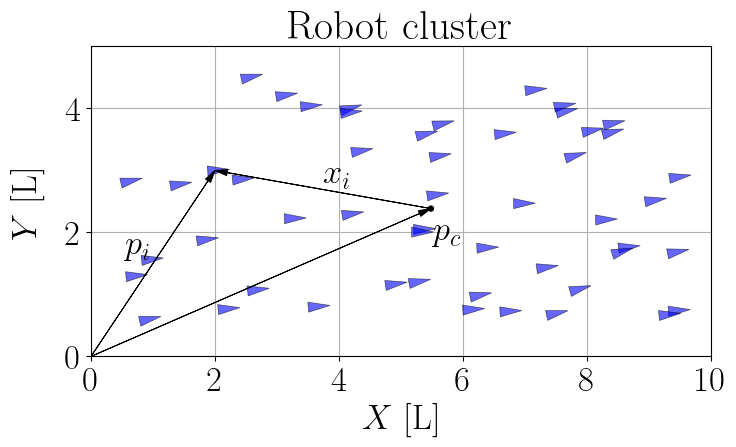

In [21]:
# Parameters ------------------------------------------------
N = 50
PX = 9*np.random.rand(N) + 0.5
PY = 4*np.random.rand(N) + 0.5

PX = np.append(2, PX)
PY = np.append(3, PY)

P = np.vstack((PX,PY)).T

# Calling the plotting function
basic_notationPlot(P, dpi=100)

[[4.         2.        ]
 [3.73205081 3.        ]]


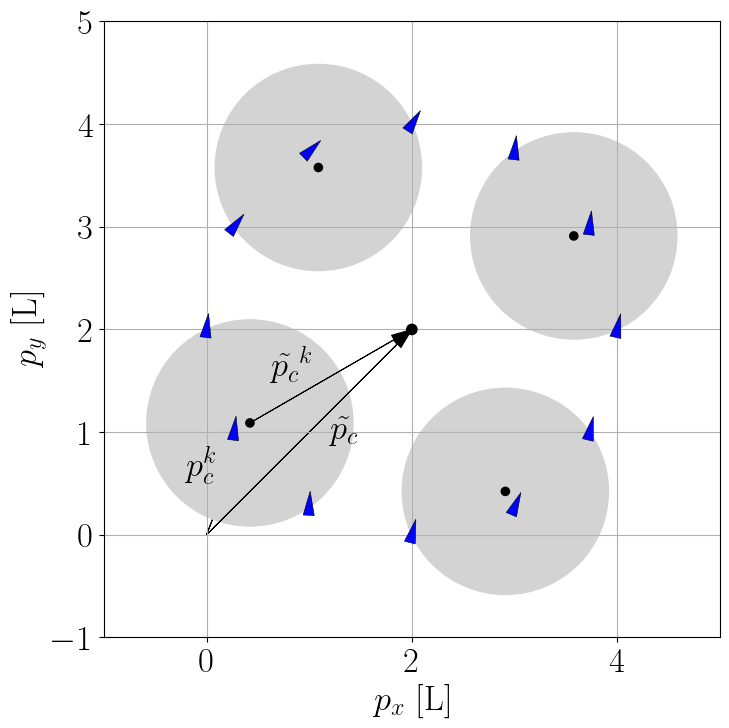

In [73]:
# Parameters
clusters = [
    cluster(np.array([
        [5, 6], [3, 4.8], [4, 4], [4, 7], [3.5, 6], [3.8, 5], [2.3, 5.8]
        ])),
    cluster(np.array([
        [6.5, 1], [7, 1.5], [7.5, 2.5], [6.2, 2.1], [7, 2.2], [6.6, 2.3]
        ])),
    cluster(np.array([
        [8, 6], [7.5, 7], [8.5, 8], [8.4, 6.2], [9, 6.6], [8.7, 7.3]
        ]))
]

# Center and radius of the decagon
center = np.array([2, 2])
radius = 2

# Angles between each point
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

# Calculate the x and y coordinates of each point
x_coords = center[0] + radius * np.cos(angles)
y_coords = center[1] + radius * np.sin(angles)

# Combine the x and y coordinates into a single array
deca = np.column_stack((x_coords, y_coords))

print(deca[0:2])

clusters_deca = [
    cluster(deca[6:9]),
    cluster(deca[0:3]),
    cluster(deca[9:12]),
    cluster(deca[3:6])
]

# Calling the plotting function
merging_notationPlot(clusters_deca)

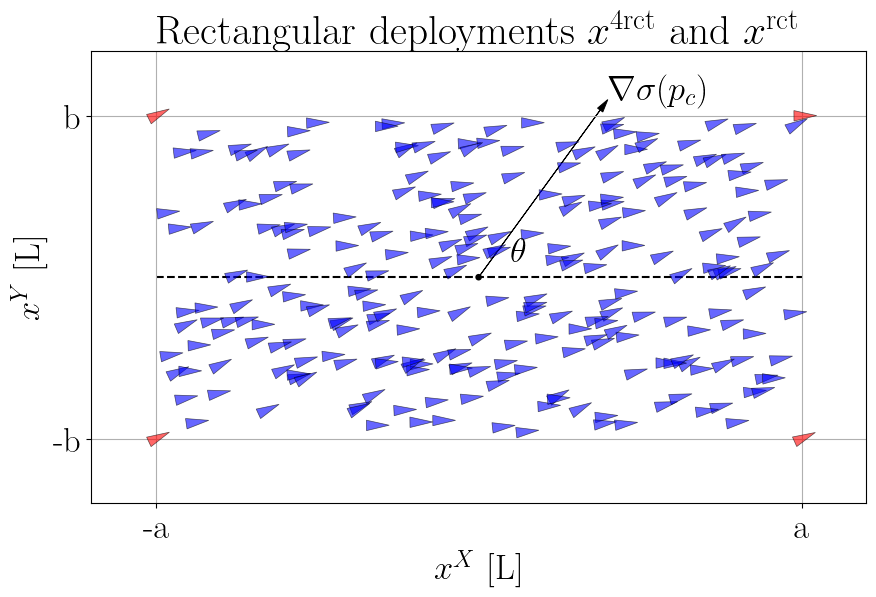

In [71]:
# Parameters
N = 250
PX = 4.9*(-1 + 2*np.random.rand(N))
PY = 2.4*(-1 + 2*np.random.rand(N))
P = np.vstack((PX,PY)).T

# Calling the plotting function
basic_rectPlot(P)

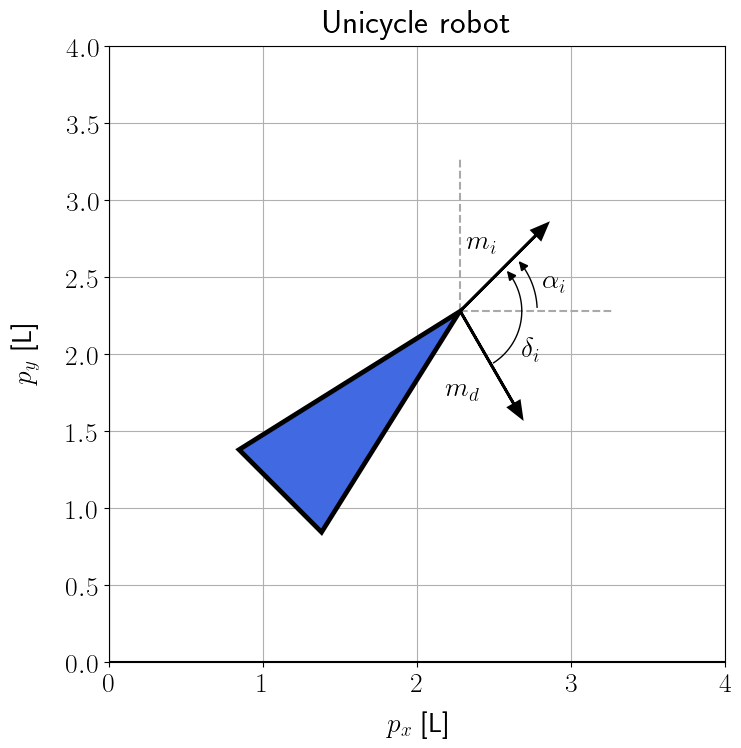

In [83]:
# Parameters ------------------------------------------------
p = np.array([1.5,1.5])
sz = 1.4

# Calling the plotting function
plot_unicycle(p, sz)

## Contour plots

In [53]:
# Parameters
f_xy   = lambda P: P[:,0] * P[:,1]
f_xxyy = lambda P: P[:,0]**2 - P[:,1]**2
star = lambda theta: 1.2*(1 + np.cos(2*theta)**2)

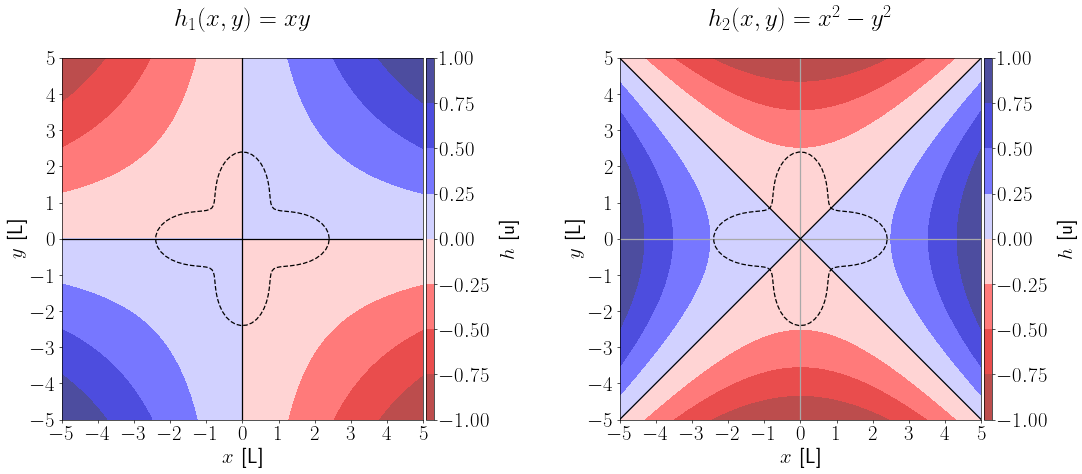

In [54]:
fig = plt.figure(figsize=(20, 12), dpi=60)
plt.subplots_adjust(wspace=0.5)
ax1, ax2 = fig.subplots(1,2)

contour_plot(ax1, f_xy, "$h_1(x,y) = xy$", 8)
contour_plot(ax2, f_xxyy, "$h_2(x,y) = x^2 - y^2$", 8)

# Drawing integration limits
theta = np.linspace(0, 2*np.pi, 100)
r = star(theta)

phi_x = r * np.cos(theta)
phi_y = r * np.sin(theta)

# Drawing axis
ax1.axvline(0, c="k")
ax1.axhline(0, c="k")
ax2.axvline(0, c="darkgrey")
ax2.axhline(0, c="darkgrey")

ax1.plot(phi_x, phi_y, "--k")
ax2.plot(phi_x, phi_y, "--k")

ax2.plot([-5,5],[5,-5], "-k")
ax2.plot([-5,5],[-5,5], "-k")

save_plot("xy_simetry")

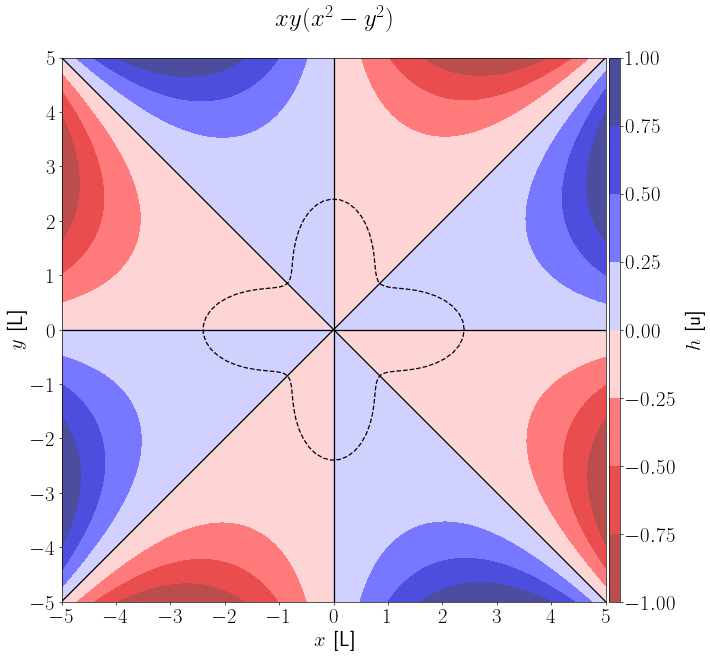

In [56]:
fig = plt.figure(figsize=(12, 12), dpi=60)
ax = fig.subplots()

contour_plot(ax, lambda P: f_xy(P) * f_xxyy(P), "$xy(x^2 - y^2)$", 8)

# Drawing integration limits
theta = np.linspace(0, 2*np.pi, 100)
r = star(theta)
phi_x = r * np.cos(theta)
phi_y = r * np.sin(theta)

ax.plot(phi_x, phi_y, "--k")
#ax.fill_between(phi_x, phi_y, color="grey", alpha=0.2)

# Drawing axis
ax.axvline(0, c="k")
ax.axhline(0, c="k")
ax.plot([-5,5],[5,-5], "-k")
ax.plot([-5,5],[-5,5], "-k")

save_plot("xy_xxyy")

## Proof plots

In [22]:
def flower(R, theta, b=3):
    r = R * (np.cos(4*theta)**2/2 + np.cos(2*theta)**2) + b
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    F = lambda t: R*(np.sin(8*t)/32 + np.sin(4*t)/8) + (3*R + 4*b)*t/4
    area = F(max(theta)) - F(min(theta))

    return x,y,area

def flower_2(R, theta, b=3):
    r = R * np.cos(2*theta)**2 + b  
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    F = lambda t: (R*np.sin(4*t) + (R + 2*b)*t)/2
    area = F(max(theta)) - F(min(theta))

    return x,y,area

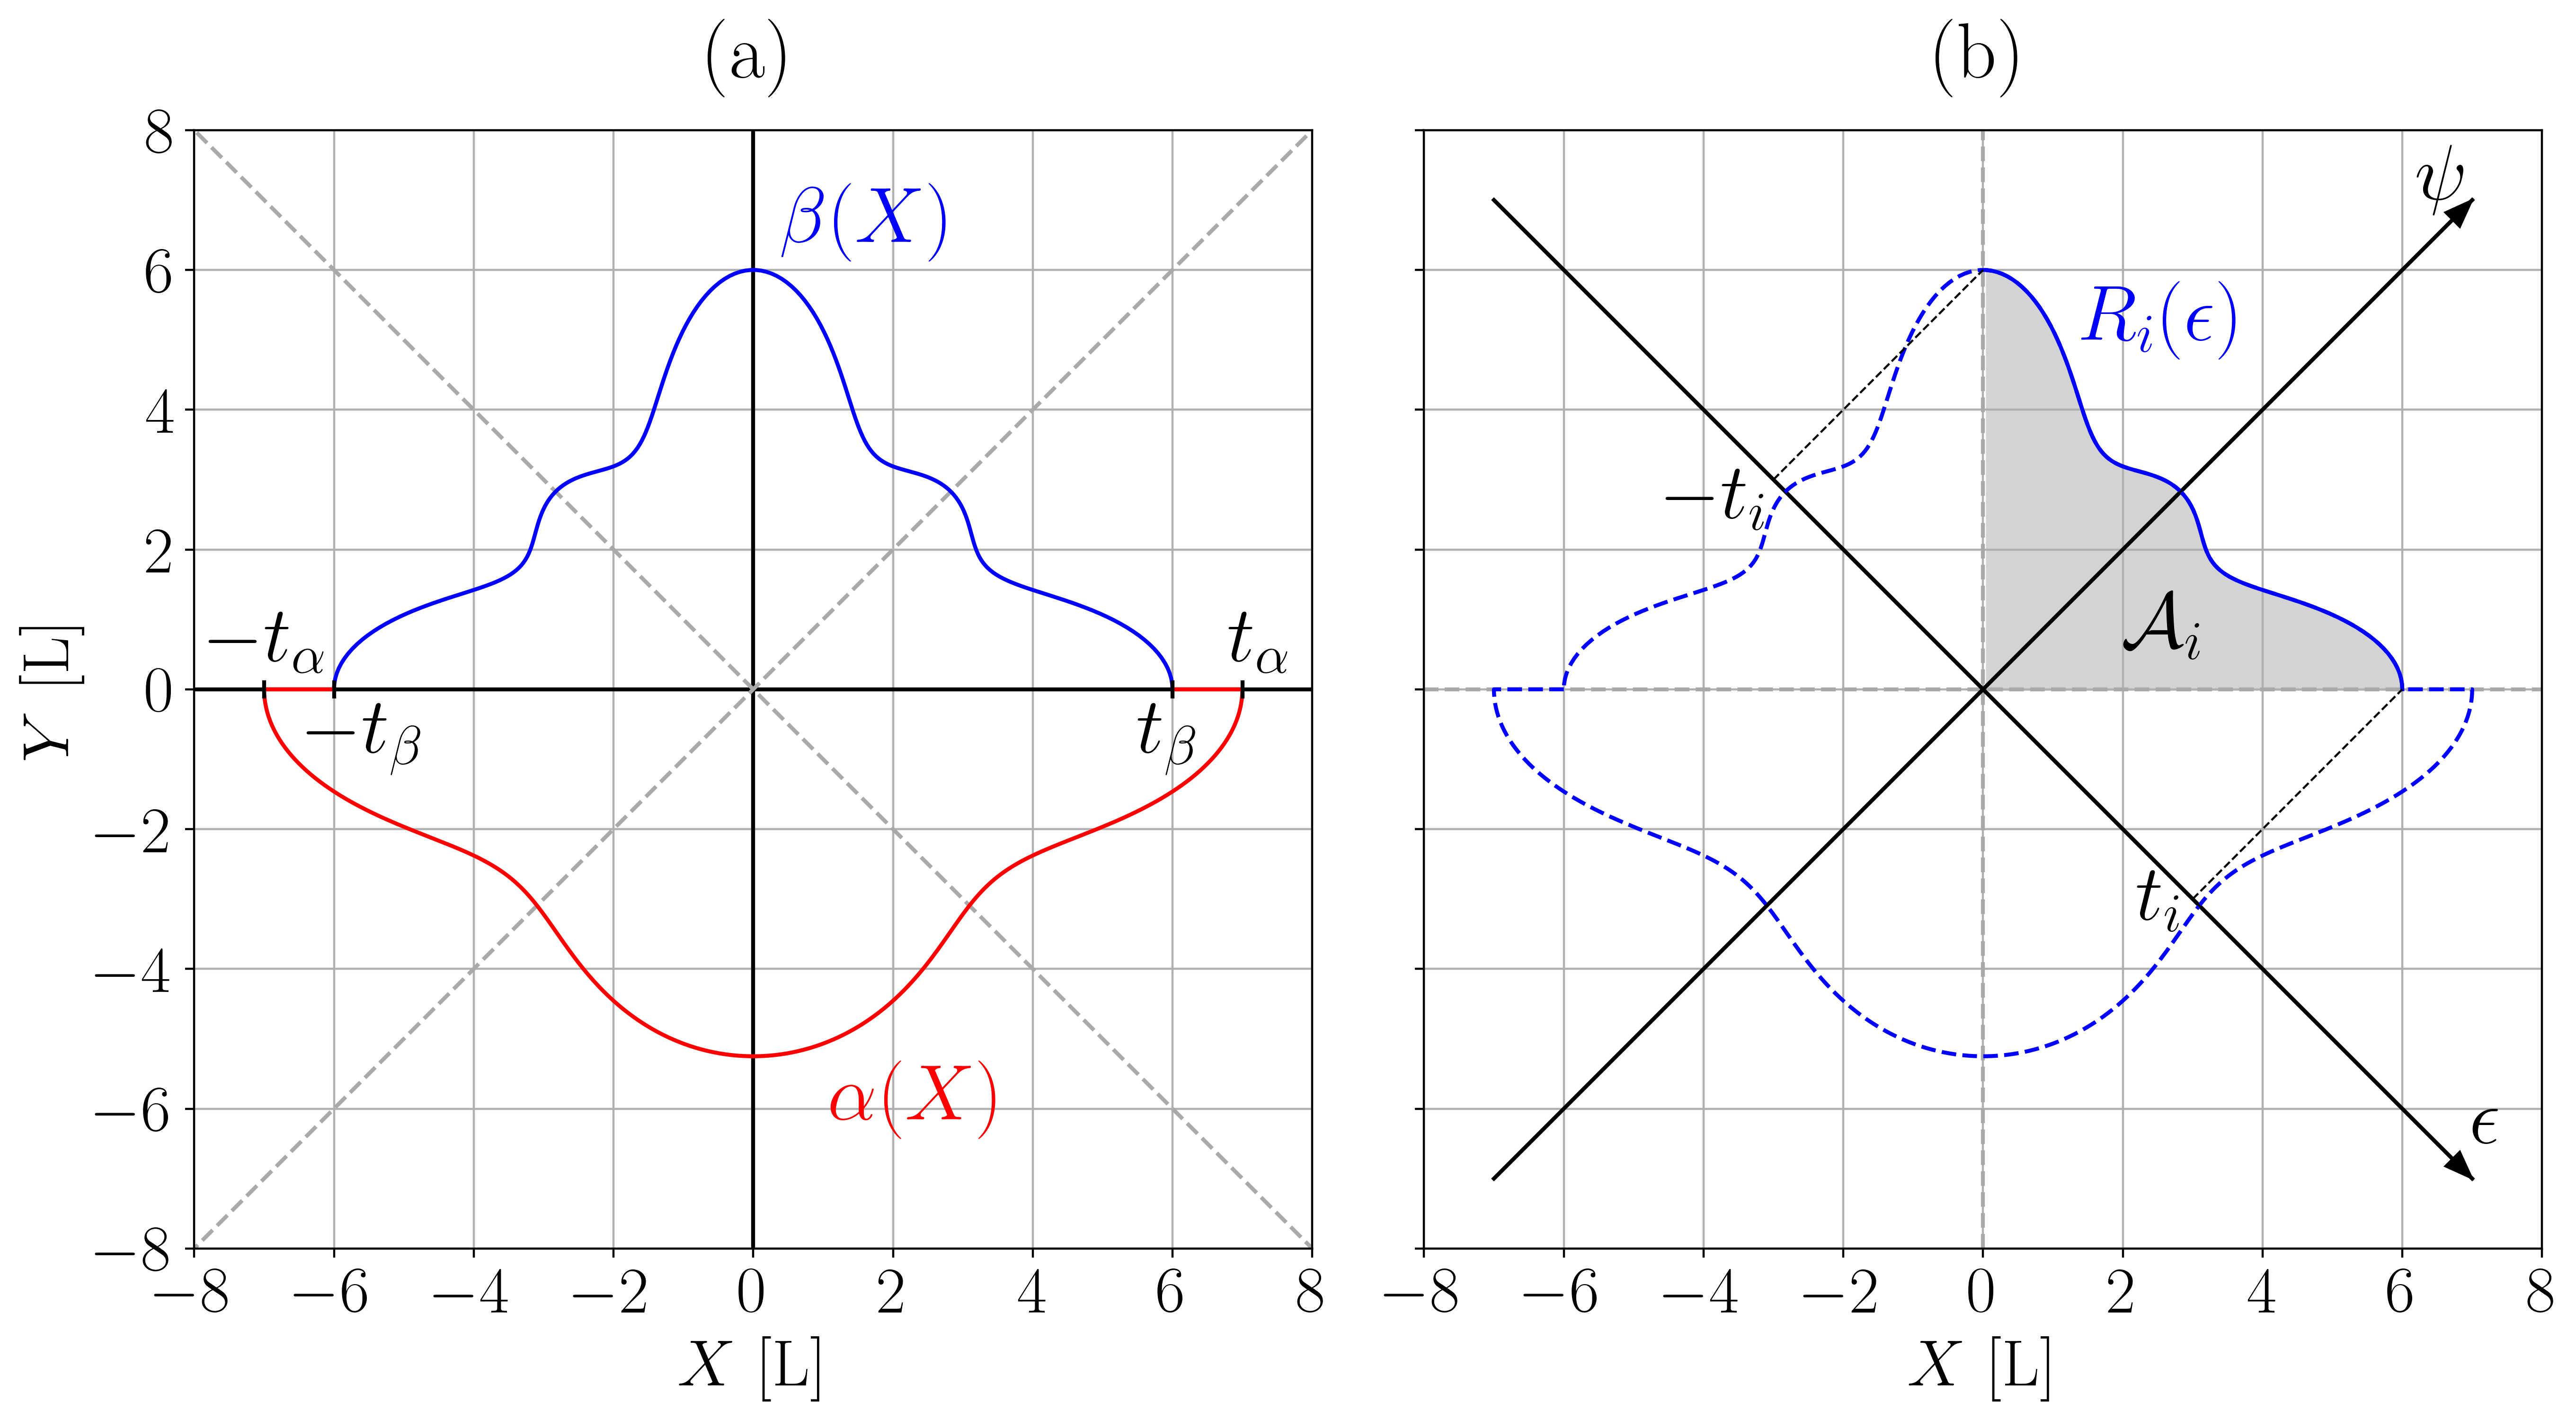

In [24]:
fig = plt.figure(figsize=(16, 8), dpi=400)
ax1, ax2  = fig.subplots(1,2)
plt.subplots_adjust(wspace=0.1)

step = 2
ax1.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(step))

# -----------------------------------------------------------------

title_size = 35
labels_size = 30
tiny_size = 30
tic_size = 30

ax = ax1

# Axis configuration
lim = 8
ax.axis([-lim, lim, -lim, lim])
ax.set_aspect("equal")
ax.set_ylabel(r"$Y$ [L]")
ax.set_xlabel(r"$X$ [L]")
ax.set_title("(a)", pad=20)
ax.grid(True)

ax.axvline(0, c="k")
ax.axhline(0, c="k")
ax.plot([-10,10],[-10,10], c='darkgrey', ls='--')
ax.plot([-10,10],[10,-10], c='darkgrey', ls='--')

# Plotting
theta = np.linspace(0, 2*np.pi, 500)

xu,yu,areau = flower(2,np.linspace(0, np.pi, 250), 3)
xd,yd,aread = flower_2(2,np.linspace(np.pi, 2*np.pi, 250), 5)

# Setting the centroid in (0,0) by making areau == aread
yd = areau/aread * yd

xd,yd = np.insert(xd, 0, min(xu)), np.insert(yd, 0, 0)
xd,yd = np.append(xd, max(xu)), np.append(yd, 0)

ax.plot(xu, yu,'-b')
ax.plot(xd, yd,'-r')

y_min, y_max = min(yd), max(yu)
ax.text(1.1, y_min - 0.9, r'$\alpha(X)$', color='red', size=labels_size)
ax.text(0.4, y_max + 0.4, r'$\beta(X)$', color='blue', size=labels_size)

# Drawing ticks and his labels
x_minu, x_maxu = min(xu), max(xu)
x_mind, x_maxd = min(xd), max(xd)
ax.plot([x_minu, x_minu], [-0.1, 0.1], 'k')
ax.plot([x_maxu, x_maxu], [-0.1, 0.1], 'k')
ax.plot([x_mind, x_mind], [-0.1, 0.1], 'k')
ax.plot([x_maxd, x_maxd], [-0.1, 0.1], 'k')

ax.text(x_minu - 0.4, -0.9, r'$-t_\beta$', size=tic_size)
ax.text(x_maxu - 0.5, -0.9, r'$t_\beta$', size=tic_size)

ax.text(x_mind - 0.8, 0.4, r'$-t_\alpha$', size=tic_size)
ax.text(x_maxd - 0.2, 0.4, r'$t_\alpha$', size=tic_size)

# -----------------------------------------------------------------

ax = ax2

# Axis configuration
lim = 8
ax.axis([-lim, lim, -lim, lim])
ax.set_aspect("equal")
#ax.set_ylabel(r"$p_y$ [L]")
ax.set_yticklabels([])
ax.set_xlabel(r"$X$ [L]")
ax.set_title("(b)", pad=20)
ax.grid(True)

L = 7
ax.axvline(0, c='darkgrey', ls='--')
ax.axhline(0, c='darkgrey', ls='--')
ax.plot([-L,L],[-L,L], c='k', ls='-')
ax.plot([-L,L],[L,-L], c='k', ls='-')
vector2d(ax, [0,0], [L,L] , ls="-", hw=0.3, hl=0.4)
vector2d(ax, [0,0], [L,-L], ls="-", hw=0.3, hl=0.4)

# Plotting alfa'(ep) and beta'(ep)
x,y,area = flower(2,theta)
x1, y1 = x[(x>=0) & (y>=0)], y[(x>=0) & (y>=0)]

ax.fill_between(x1, y1, 0, color='lightgrey')
ax.plot(x1, y1,'-b')
ax.plot(xu, yu,'--b')
ax.plot(xd, yd,'--b')

# Diagonal lines
ax.plot([-3,0],[3,6], c='k', ls='--', lw=0.8)
ax.plot([3,6],[-3,0], c='k', ls='--', lw=0.8)

# Text symbols
ax.text(2.0, 0.6, r'$\mathcal{A}_i$', size=labels_size)
ax.text(1.4, 5.0, r'$R_i(\epsilon)$', c='blue', size=labels_size)

ax.text(L, -L + 0.5, r'$\epsilon$', size=tiny_size)
ax.text(L - 0.8, L, r'$\psi$', size=tiny_size)

ax.text(-4.55, 2.45, r'$-t_i$', size=tic_size)
ax.text(2.2, -3.3, r'$t_i$', size=tic_size)

# -----------------------------------------------------------------

# Plot show --
plt.savefig('obs_xxyy.eps', format='eps')
plt.show()

## Proposition 2

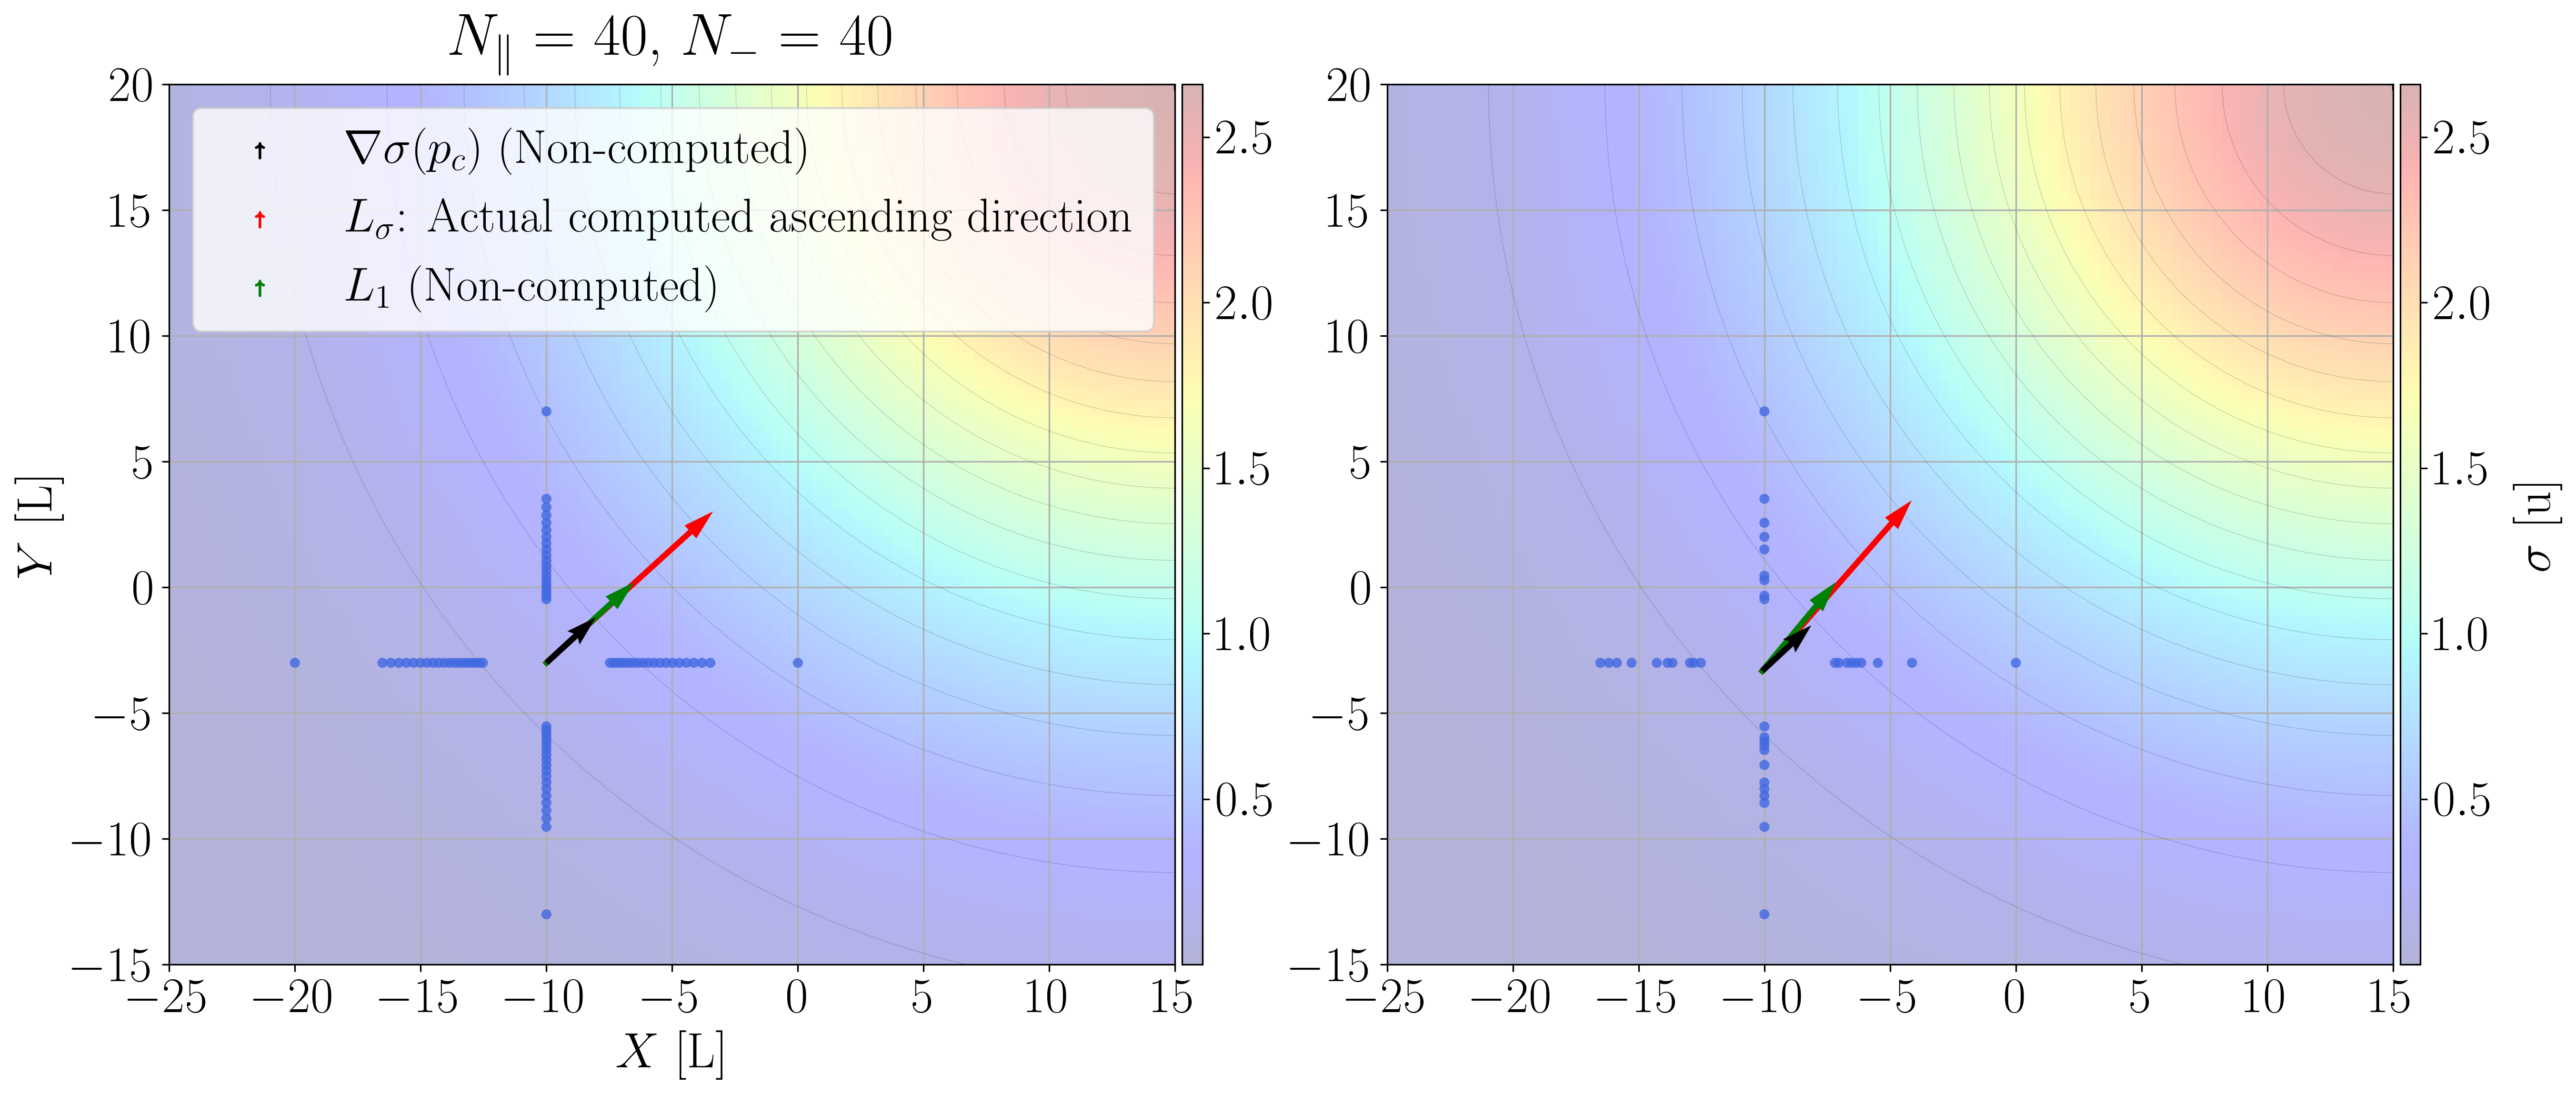

In [12]:
def plot_cross(ax, p0, nx, ny, a1, a2, lx, ly, n_rm=0, lab=r"$\sigma$ [u]", title_sw=True):
    # Generating the scalar field
    sigma_func = sigma_gauss(mu=[15,20], max_intensity=100, dev=15)
    sigma_test = sigma(sigma_func)

    # Generate the formation -----------------
    a_x1d = calculate_a(nx, a1)
    a_y1d = calculate_a(ny, a2)

    P_x = a_x1d.reshape(1, np.size(a_x1d))
    P_x = P_x/np.max(np.abs(P_x))
    P_x = np.vstack((P_x*lx, np.zeros((1, np.size(P_x)))))

    P_y = a_y1d.reshape(1, np.size(a_y1d))
    P_y = P_y/np.max(np.abs(P_y))
    P_y = np.vstack((np.zeros((1, np.size(P_y))), P_y*ly))

    P = np.hstack((P_x,P_y)).T + p0
    P = np.copy(P[np.random.choice(range(P.shape[0]), P.shape[0]-n_rm, replace=False), :])


    pc = np.mean(P, axis=0)

    # Compute the measured sigma values
    sigma_values = sigma_test.value(P)

    # Compute L_sigma
    l_sigma = L_sigma(P - pc, sigma_values)*400
    # l_sigma = l_sigma/np.sqrt(l_sigma[0]**2 + l_sigma[1]**2)

    # Compute L_sigma^1
    l1_vec = sigma_test.draw_L1(pc, P)*400
    # l1_vec = l1_vec/np.sqrt(l1_vec[0]**2 + l1_vec[1]**2)

    # Plot ----------------------
    if title_sw:
        title = r"$N_\parallel$ = {0:d}, $N_-$ = {1:d}".format(nx,ny)
        # title = title + r", $\quad a_1^\parallel$ = {0:.1f}, $a_1^-$ = {1:.1f}".format(lx,ly)
        ax.set_title(title, pad=15)

    # Draw the scalar field
    sigma_test.draw(fig=fig, ax=ax, xlim=60, ylim=40, n=300, contour_levels=20, cbar_lab=lab)

    # Draw the agents
    for n in range(nx + ny - n_rm):
        ax.add_patch(plt.Circle(P[n], 0.2, color="royalblue", alpha=0.8, lw=0, zorder=3))

    # Draw the gradient at pc, L^1 and L
    kw = {"lw": 2.8, "hw": 0.4, "hl": 0.7}
    sigma_test.draw_grad(pc, ax, width=0.006, scale=15, zorder=5, norm_fct=400)
    vector2d(ax, pc, l_sigma*6, c="red"  , zorder=4, **kw)
    vector2d(ax, pc, l1_vec *6, c="green", zorder=4, **kw)

# ----------------------------------------------------------------------
# Parameters
# ----------------------------------------------------------------------
  
p0 = np.array([-10,-3])

nx, ny = 40, 40
a1, a2 = 0.9, 0.9
lx, ly = 10, 10

# ----------------------------------------------------------------------
# PAPER PLOT
# ----------------------------------------------------------------------

# Generate the plot
fig = plt.figure(figsize=(21, 8), dpi=300)
ax1, ax2  = fig.subplots(1,2)
plt.subplots_adjust(wspace=0.1)

step = 5
ax1.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(step))

# Axis configuration
ax1.set_xlim([-25,15])
ax1.set_ylim([-15,20])
ax1.set_xlabel(r"$X$ [L]")
ax1.set_ylabel(r"$Y$ [L]")
ax1.set_aspect("equal")

ax2.set_xlim([-25,15])
ax2.set_ylim([-15,20])
ax2.set_aspect("equal")

# Generate the legend
arr1 = plt.scatter([],[],c='k'  ,marker=r'$\uparrow$',s=60)
arr2 = plt.scatter([],[],c='red',marker=r'$\uparrow$',s=60)
arr3 = plt.scatter([],[],c='green',marker=r'$\uparrow$',s=60)

leg = Legend(ax1, [arr1, arr2, arr3], 
             [r"$\nabla \sigma (p_c)$ (Non-computed)",
              r"$L_{\sigma}$: Actual computed ascending direction",
              r"$L_1$ (Non-computed)"],
            loc="upper left", prop={'size': 24})
ax1.add_artist(leg)

# Plot the simulation
plot_cross(ax1, p0, nx, ny, a1, a2, lx, ly, n_rm=0, lab="")
plot_cross(ax2, p0, nx, ny, a1, a2, lx, ly, n_rm=40, title_sw=False)

ax1.grid(True)
ax2.grid(True)

# Show the plot!
plt.show()